Car Plate Read


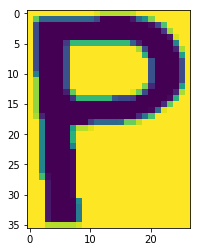

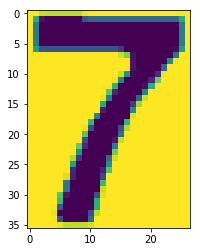

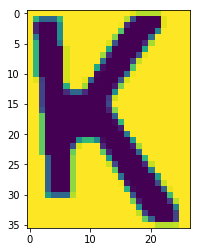

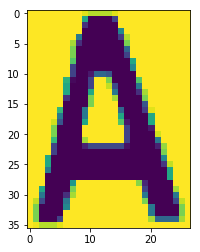

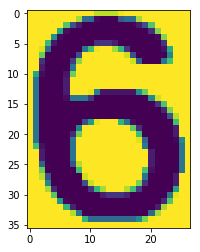

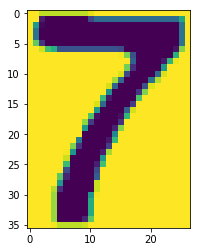

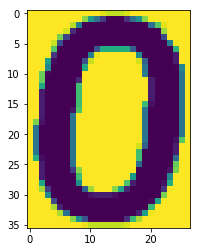

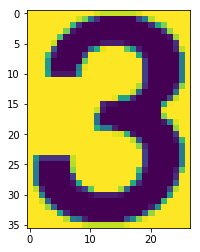

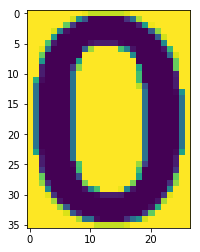

Predicted license plate
P7KA67030
License plate
KA06P7703


In [ ]:
import pickle
import matplotlib
from sklearn.externals import joblib
import numpy as np
from scipy import misc
from skimage.io import imread
from skimage.filters import threshold_otsu
from skimage import measure
from skimage.measure import regionprops
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from skimage.transform import resize
import cv2
import os
%matplotlib inline

plate=[]
column_list=[]
filename = 'character_model_svm_success.sav'
model = pickle.load(open(filename, 'rb'))
classification_result = []
characters=[]
column_list=[]
img=cv2.imread('carplate2.jpg',1)
size=(600,150)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img=cv2.resize(img,size,interpolation=cv2.INTER_AREA)
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
ret,thresh_image = cv2.threshold(img,70,255,cv2.THRESH_BINARY_INV)
kernel = np.ones((5,5),np.uint8)
print('Car Plate Read')

# Opening- erosion followed by dilation to remove noise
#opening = cv2.morphologyEx(thresh_image,cv2.MORPH_OPEN,kernel)
#scv2.imshow('img',opening)

#Closing- erosion followed by dilation to remove noise
closing = cv2.morphologyEx(thresh_image,cv2.MORPH_CLOSE,kernel)
#cv2.imshow('img1',closing)
# Opening 
opening1 = cv2.morphologyEx(closing,cv2.MORPH_OPEN,kernel)
#cv2.imshow('img2',opening1)


######################################## Connected Component Analysis ###############################

img = np.uint8(closing)
connectivity = 4
output=[]
result=[]
# Perform the operation
output = cv2.connectedComponentsWithStats(img,connectivity, cv2.CV_32S)

# The first cell is the number of labels
num_labels = output[0]

# The second cell is the label matrix
labels = output[1]

# The third cell is the stat matrix
stats = output[2]
#print(stats)
# The fourth cell is the centroid matrix
centroids = output[3]
ws=[]
hs=[]
R=[]
################## Draw Rectangle ##########################
for i in range(len(stats)):
    m=stats[i]
    x=m[0]
    y=m[1]
    w=m[2]
    h=m[3]
    area=m[4]
    ws.append(w)
    hs.append(h)
    if (w>5 and w<60):
        if (h>25 and h<120):
            if (area>500 and area<3000):
                R.append(x)
                #img1 = cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,255),1)
                img1=img[y-2:y+h+2,x-2:x+w+2]
                img1=cv2.morphologyEx(img1,cv2.MORPH_OPEN,kernel)
                size=(27,36)
                img1=255-img1
                #ret,thresh_image = cv2.threshold(img,0,1,cv2.THRESH_BINARY)
                
                img1=cv2.resize(img1,size,interpolation=cv2.INTER_AREA)
                characters.append(img1)
                
                # this is just to keep track of the arrangement of the characters
                column_list.append(x)
                plt.imshow(img1)
                plt.show()
    
#print(hs)
#print(ws)
# characters = session['plate_characters']
for each_character in characters:
    # converts it to a 1D array
    each_character = each_character.reshape(1, -1);
    result = model.predict(each_character)
    classification_result.append(result)
plate_string = ''
for eachPredict in classification_result:
    plate_string += eachPredict[0]
print('Predicted license plate')
print(plate_string)

column_list_copy = column_list[:]
column_list.sort()
rightplate_string = ''

for each in column_list:
    rightplate_string += plate_string[column_list_copy.index(each)]
print('License plate')
print(rightplate_string)

cv2.waitKey(0)

